In [1]:
####Importing all the necessary Librabries
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from tqdm.auto import tqdm
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## LOADING THE DATA FILE AND IMPORTING FROM A SPECIFIC LOCATION IT INTO PYTHON
When you first load a dataset in Python, it's essential to carry out several preliminary steps to understand its structure, content, and quality.

In [2]:
###Loading the dataset into a Pandas DataFrame.
## Its a csv file and it is very important to know and identify the location of the file.
data = pd.read_csv (r'C:\Users\acer\Downloads\Health_data_new.csv')

### INSPECTING THE DATA
2.1. Check the first few rows:
Use the head() method to see the first few rows of the dataset, within the parathensis, one can specify the number of first rows they want to view.
This also gives a snippet of what the data looks like. 

In [3]:
data.head(5)

,City_ID,State,doctor_availability_rate,hospital_availability_rate,annual_per_capita,population_density,death_rate
0,1000,s104,773.177527,823.579167,21.622655,27.606263,7.448700
1,1001,s105,525.493029,607.302537,19.123286,40.786864,10.081136
2,1002,s101,574.615664,627.912321,17.670255,41.327670,9.795441
3,1003,s104,593.601517,640.842500,19.234267,34.235168,9.545358
4,1004,s103,462.664965,533.419684,16.171985,44.218356,10.649668


## CHECK THE LAST FEW ROWS
Similarly, use the tail() method to see the last few rows.

In [4]:
data.tail(5)

,City_ID,State,doctor_availability_rate,hospital_availability_rate,annual_per_capita,population_density,death_rate
1995,2995,s105,447.105465,433.585308,13.439503,41.849029,11.028052
1996,2996,s105,511.849578,620.997015,15.964755,42.660675,10.111233
1997,2997,s101,592.656592,727.956049,21.068475,36.428440,9.069662
1998,2998,s105,520.888333,586.624619,16.721896,42.406453,10.060605
1999,2999,s101,551.242696,697.068423,17.983537,37.031637,9.749643


##  GET A CONCISE SUMMARY OF THE DATA FRAME
The info() method provides a summary of the DataFrame, including the number of non-null entries and data types for each column.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City_ID                     2000 non-null   int64  
 1   State                       2000 non-null   object 
 2   doctor_availability_rate    2000 non-null   float64
 3   hospital_availability_rate  2000 non-null   float64
 4   annual_per_capita           2000 non-null   float64
 5   population_density          2000 non-null   float64
 6   death_rate                  1967 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 109.5+ KB


## STATISTICAL SUMMARY
The describe() method provides summary statistics for numerical columns.
This foundational analysis is crucial for understanding the distribution and central values in your data.

In [6]:
data.describe()

,City_ID,doctor_availability_rate,hospital_availability_rate,annual_per_capita,population_density,death_rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1967.000000
mean,1999.500000,584.579841,663.231582,18.222888,37.277126,9.290993
std,577.494589,144.085315,151.363999,3.595416,7.145640,1.724680
min,1000.000000,44.155200,86.663459,4.009732,10.894868,3.186223
25%,1499.750000,509.065656,577.497153,16.229899,33.401743,8.322182
50%,1999.500000,593.901162,676.518731,18.491890,37.778280,9.437314
75%,2499.250000,676.737022,764.318146,20.516293,41.861463,10.376068
max,2999.000000,952.193953,1068.699512,28.095823,54.896516,13.316359


## Understand Data Types and Missing Values
3.1. Data types:
Check the data types of each column.

In [7]:
print(data.dtypes)

City_ID                         int64
State                          object
doctor_availability_rate      float64
hospital_availability_rate    float64
annual_per_capita             float64
population_density            float64
death_rate                    float64
dtype: object


## Missing values
Check for missing values in the dataset.

In [8]:
print(data.isnull().sum())

City_ID                        0
State                          0
doctor_availability_rate       0
hospital_availability_rate     0
annual_per_capita              0
population_density             0
death_rate                    33
dtype: int64


## DATA CLEANING/ CLEANSING
HANDLE MISSING VALUES

We can see that the death_rate column has missing values with a total sum of 33 counts
They are various ways to decide how to handle missing values: drop, fill, or other imputation methods.
1. Drop/Delete the missing values is not efficient/ suitable if the dataset is big.
2. The imputation method is when we find the mean value for that column in the dataset and then replace it with the same value
NB: In this dataset, we are going to use the second option as the missing values are many.

In [9]:
data['death_rate'].mean()

9.290992592647687

In [10]:
###Replacing Null Values with the Mean
mean_value = data['death_rate'].mean() 
data['death_rate'].fillna(value=mean_value, inplace=True) 

C:\Users\acer\AppData\Local\Temp\ipykernel_4632\2064021792.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['death_rate'].fillna(value=mean_value, inplace=True)


In [11]:
print(data)

      City_ID State  doctor_availability_rate  hospital_availability_rate  \
0        1000  s104                773.177527                  823.579167   
1        1001  s105                525.493029                  607.302537   
2        1002  s101                574.615664                  627.912321   
3        1003  s104                593.601517                  640.842500   
4        1004  s103                462.664965                  533.419684   
...       ...   ...                       ...                         ...   
1995     2995  s105                447.105465                  433.585308   
1996     2996  s105                511.849578                  620.997015   
1997     2997  s101                592.656592                  727.956049   
1998     2998  s105                520.888333                  586.624619   
1999     2999  s101                551.242696                  697.068423   

      annual_per_capita  population_density  death_rate  
0             21.

In [12]:
pd.isnull(data).value_counts()

City_ID  State  doctor_availability_rate  hospital_availability_rate  annual_per_capita  population_density  death_rate
False    False  False                     False                       False              False               False         2000
Name: count, dtype: int64

## Convert data types:
The 'State' column has object as a data type, there is a need for this data type to be converted.

In [13]:
data['State'] = pd.to_numeric(data['State'], errors='coerce').fillna(0).astype(int)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City_ID                     2000 non-null   int64  
 1   State                       2000 non-null   int32  
 2   doctor_availability_rate    2000 non-null   float64
 3   hospital_availability_rate  2000 non-null   float64
 4   annual_per_capita           2000 non-null   float64
 5   population_density          2000 non-null   float64
 6   death_rate                  2000 non-null   float64
dtypes: float64(5), int32(1), int64(1)
memory usage: 101.7 KB


## Analyze Column-wise Data
Unique values:
For categorical columns, check the unique values.

## EXPLORATORY DATA ANALYSIS
Exploratory Data Analysis (EDA) is a critical step in the data analysis process. It involves summarizing and visualizing the main characteristics of a dataset, often with the help of graphical representations. 
Analysis can be done in three ways; Univariate, Bi-Variate and Multi-Variate
1. Univariate Analysis : Analyze individual columns to show distribution, central tendancy and dispersion. The possible plots include; Histograms, Box Plots, Value Counts.
2. Bi-Variate Analysis: Analyze relationships between pairs of variables. The possible plots include; Scatter Plots, Correlation Matrix and Heat Map, Box Plot (Continous vs Categorical Data)
3. Mulit-Variate Analysis: Analyze relationships between more than 2 variables. The possible plots include; Pair Plots, Facet Plots, Swarm Plots

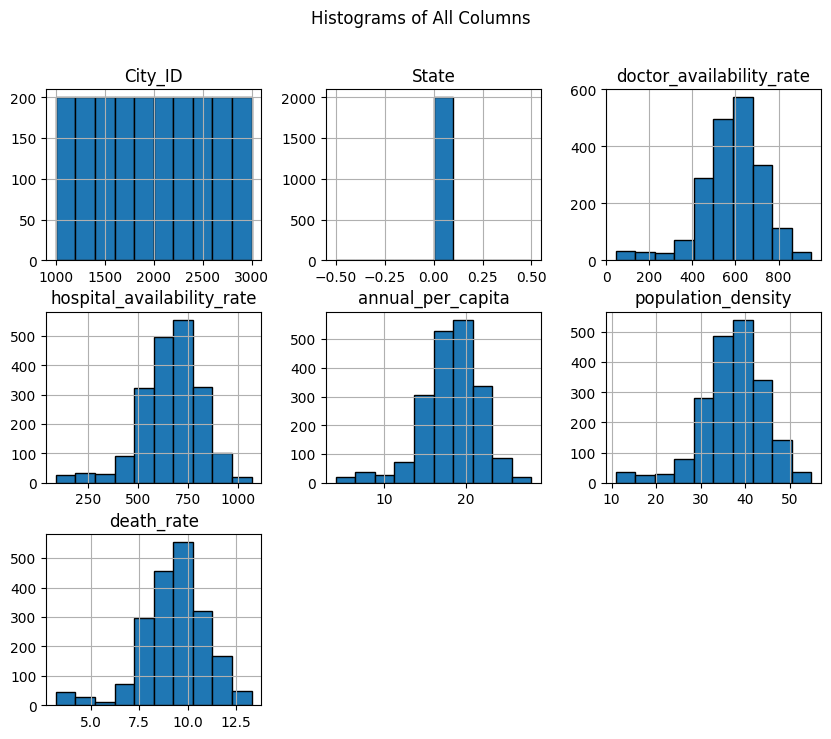

In [15]:
## 1. PLOTTING HISTOGRAMS
data.hist(bins=10, figsize=(10, 8), edgecolor='black')
plt.suptitle('Histograms of All Columns')
plt.show()

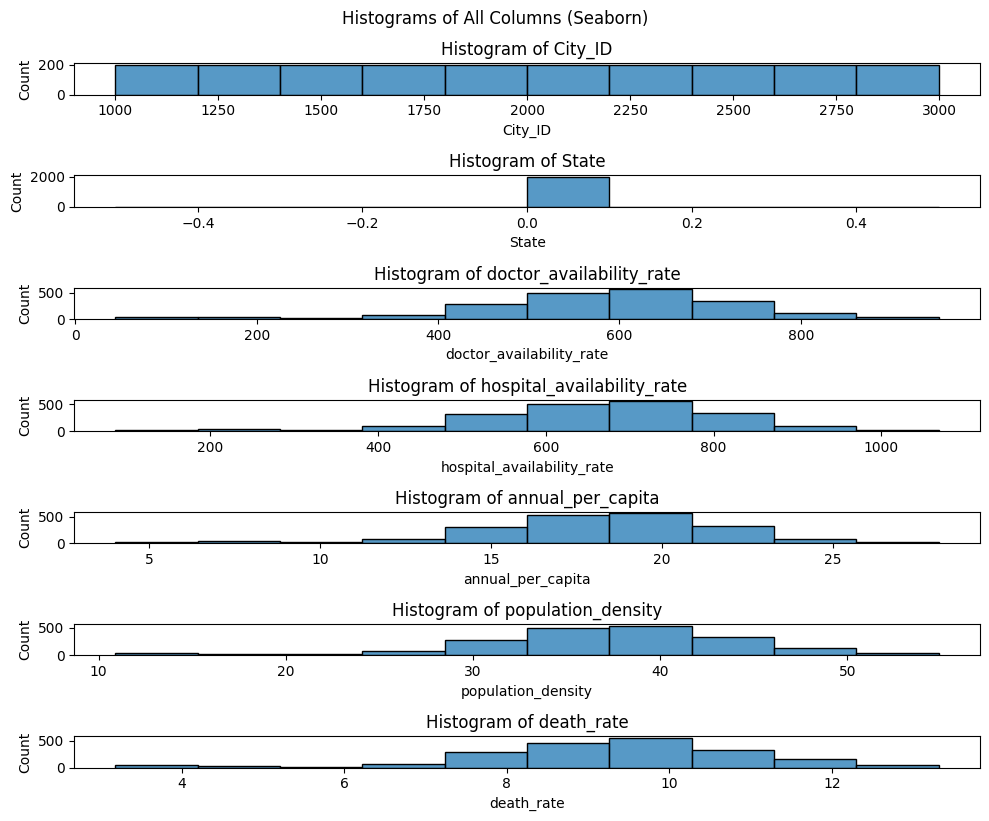

In [16]:
###Plotting the Histogram using Seaborn
plt.figure(figsize=(10, 8))

for i, column in enumerate(data.columns, 1):
    plt.subplot(len(data.columns), 1, i)
    sns.histplot(data[column], bins=10, kde=False)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.suptitle('Histograms of All Columns (Seaborn)', y=1.02)
plt.show()

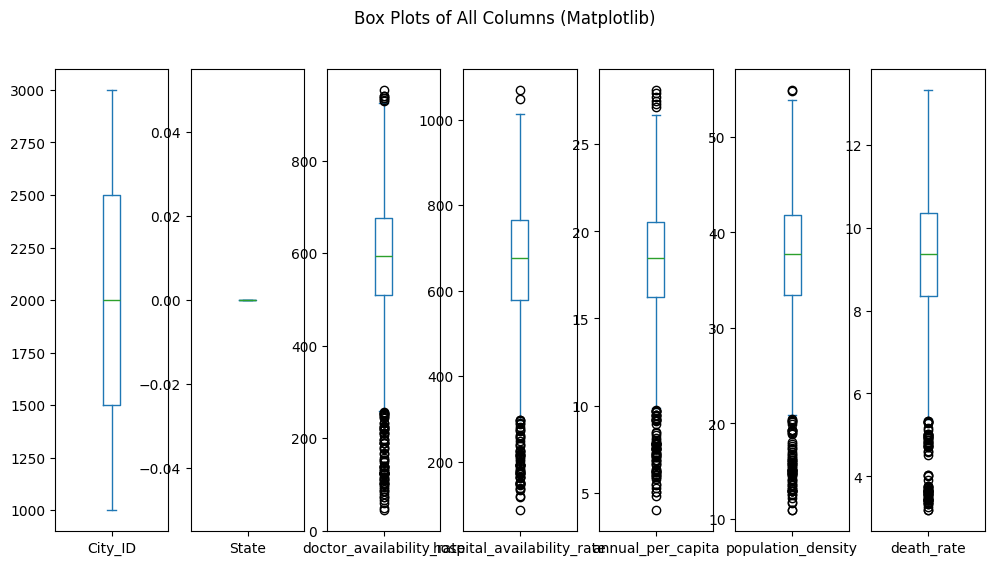

In [17]:
# Plot box plots for all columns
##Plotting Box Plot using Matplotlib
##Box Plots shows the distributions and identify outliers
data.plot(kind='box', subplots=True, layout=(1, len(data.columns)), figsize=(12, 6), sharex=False, sharey=False)

# Add a title to the figure
plt.suptitle('Box Plots of All Columns (Matplotlib)')
plt.show()

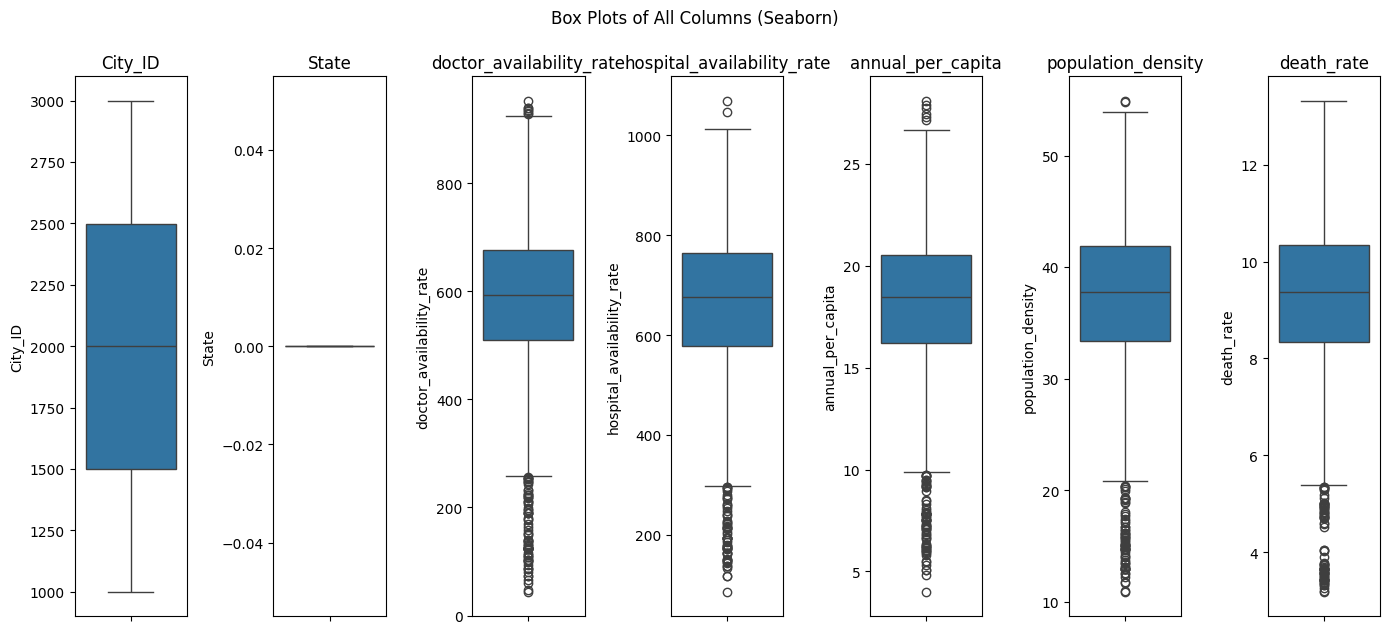

In [18]:
# Plot box plots for all columns using Seaborn
plt.figure(figsize=(14, 6))

for i, column in enumerate(data.columns, 1):
    plt.subplot(1, len(data.columns), i)
    sns.boxplot(y=data[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.suptitle('Box Plots of All Columns (Seaborn)', y=1.05)
plt.show()

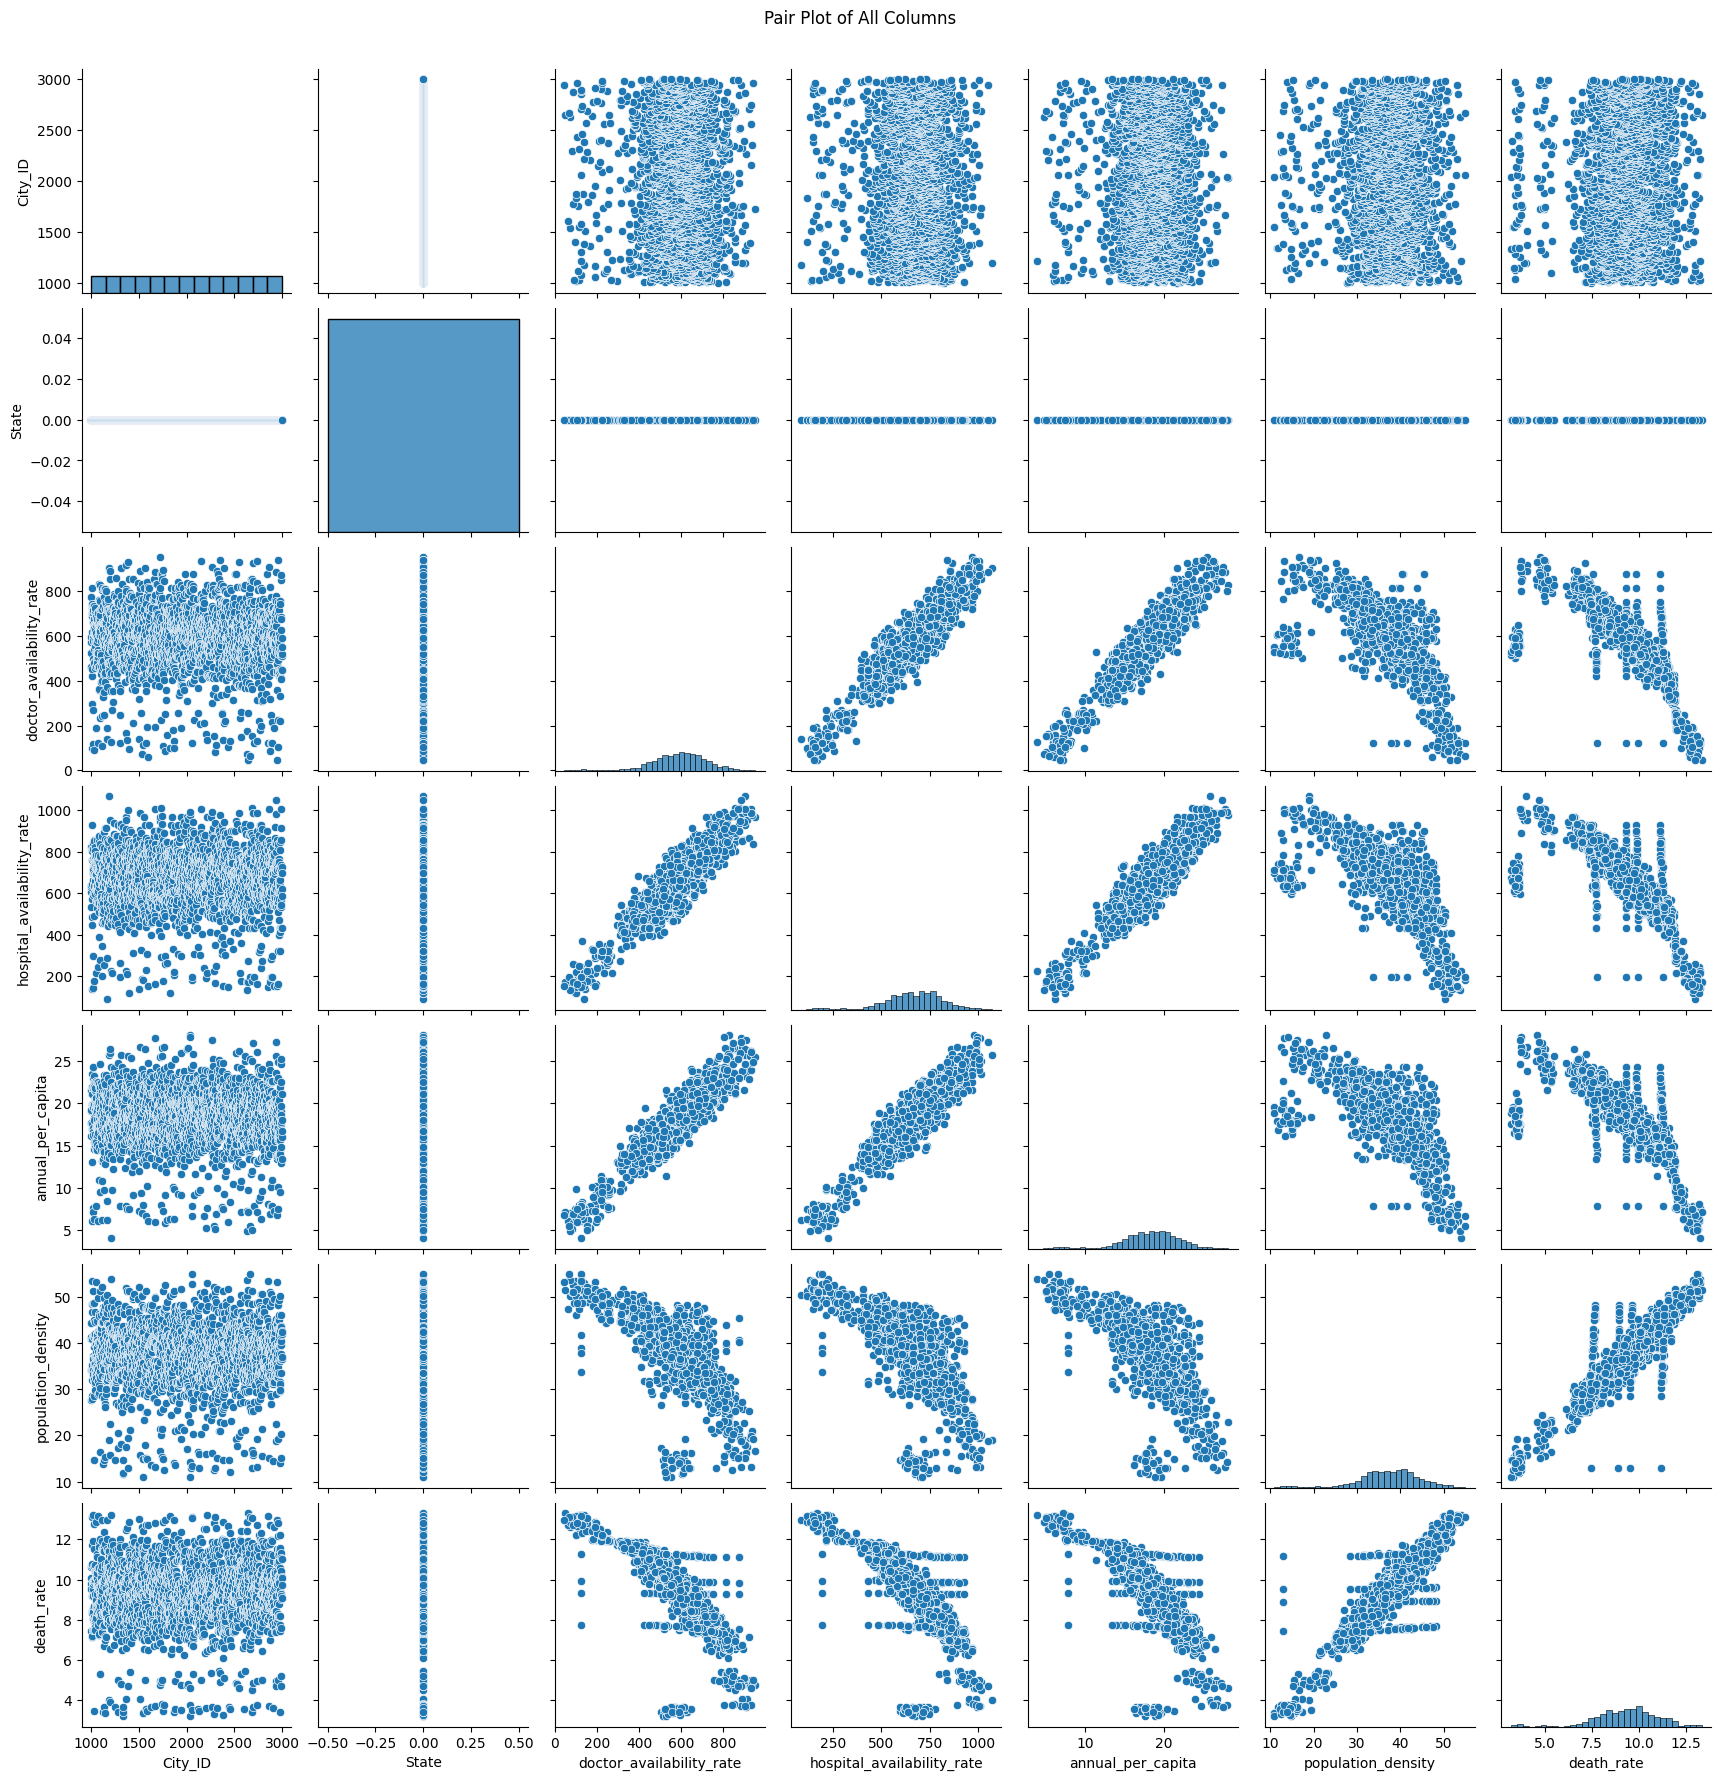

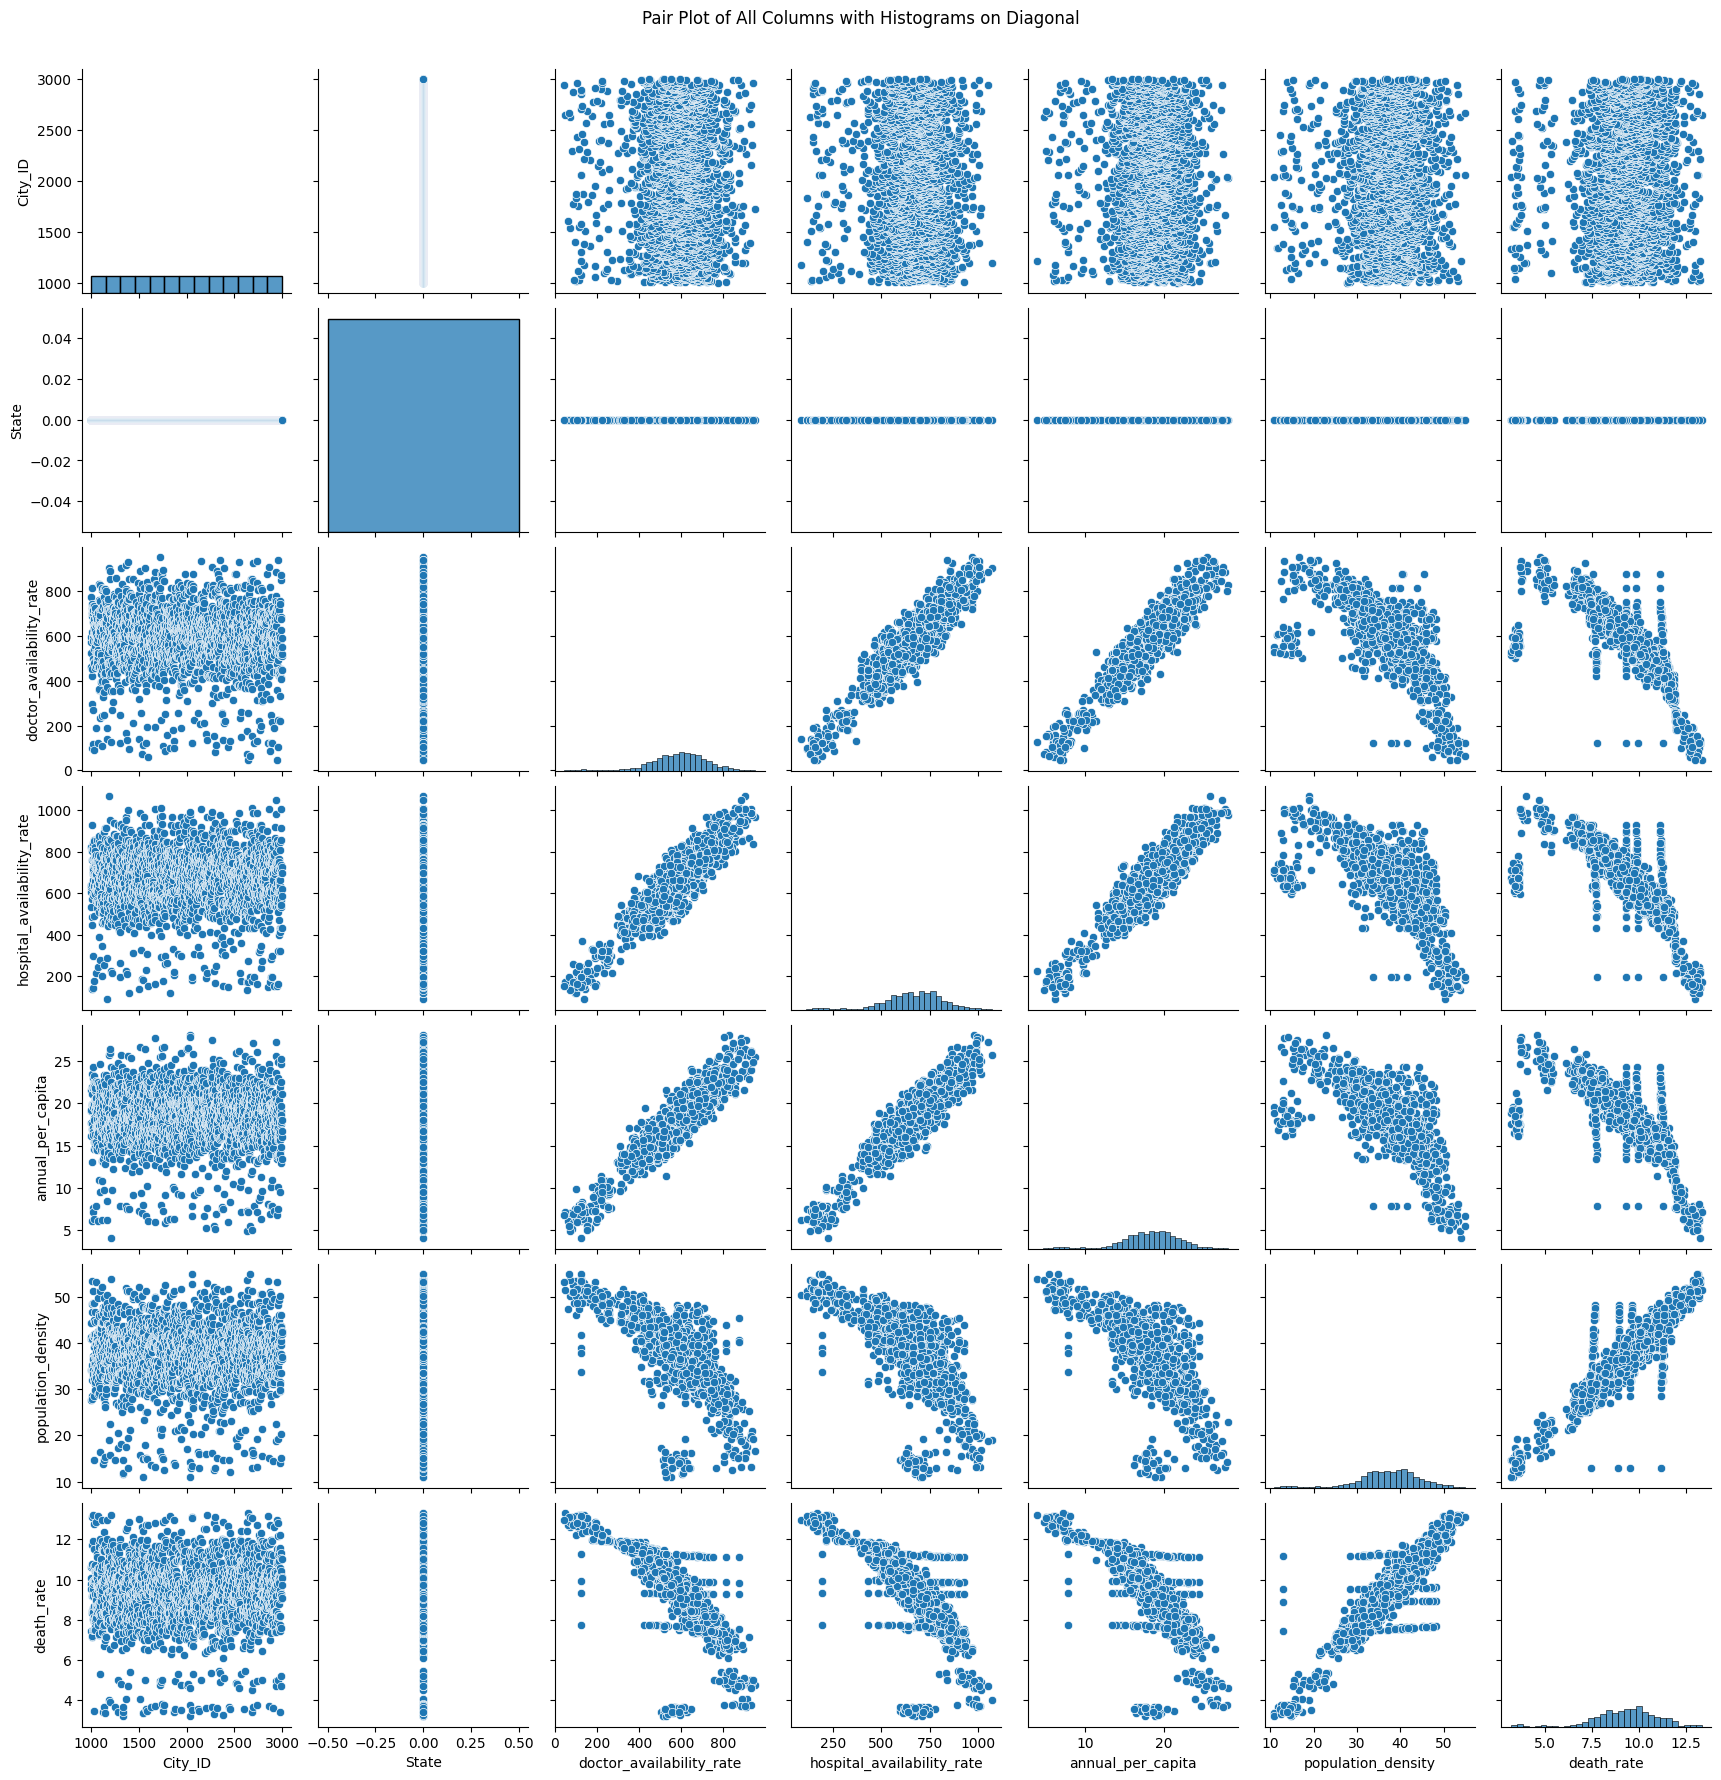

In [19]:
## Pair Plots shows the relationship between all pairs of numerical variables
# Create a pair plot for all columns
##SCATTER PLOTS 
##Scatter Plots depicts the relationships between 2 numerical values
## NB: Seaborn's pairplot: A powerful function to create scatter plot matrices for all pairs of columns in a DataFrame.
### Customization: You can customize the pair plot with various options like hue and diag_kind.
sns.pairplot(data)
plt.suptitle('Pair Plot of All Columns', y=1.02)
plt.show()

# Create a pair plot with histograms on the diagonal
sns.pairplot(data, diag_kind='hist')
plt.suptitle('Pair Plot of All Columns with Histograms on Diagonal', y=1.02)
plt.show()

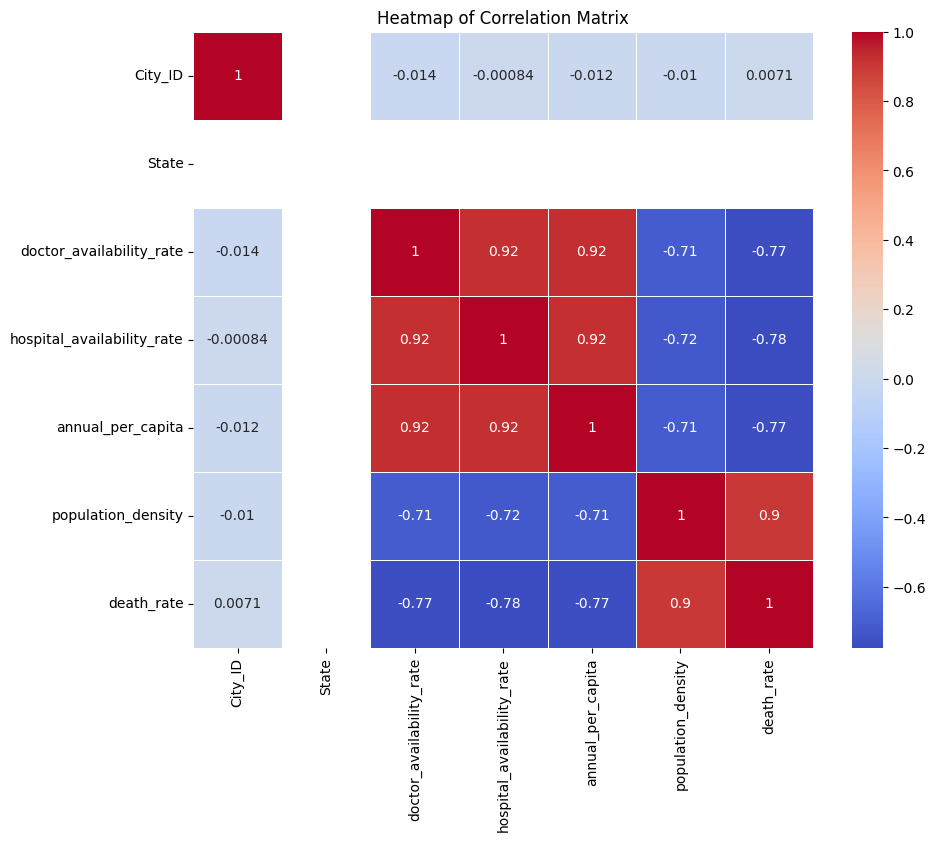

In [20]:
##HEAT MAPS 
## Shows the vizualization of correlation of Matrices
##First Calculate the Correlation Matrix
# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# Add a title to the heatmap
plt.title('Heatmap of Correlation Matrix')
##sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
##sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
##sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.show()

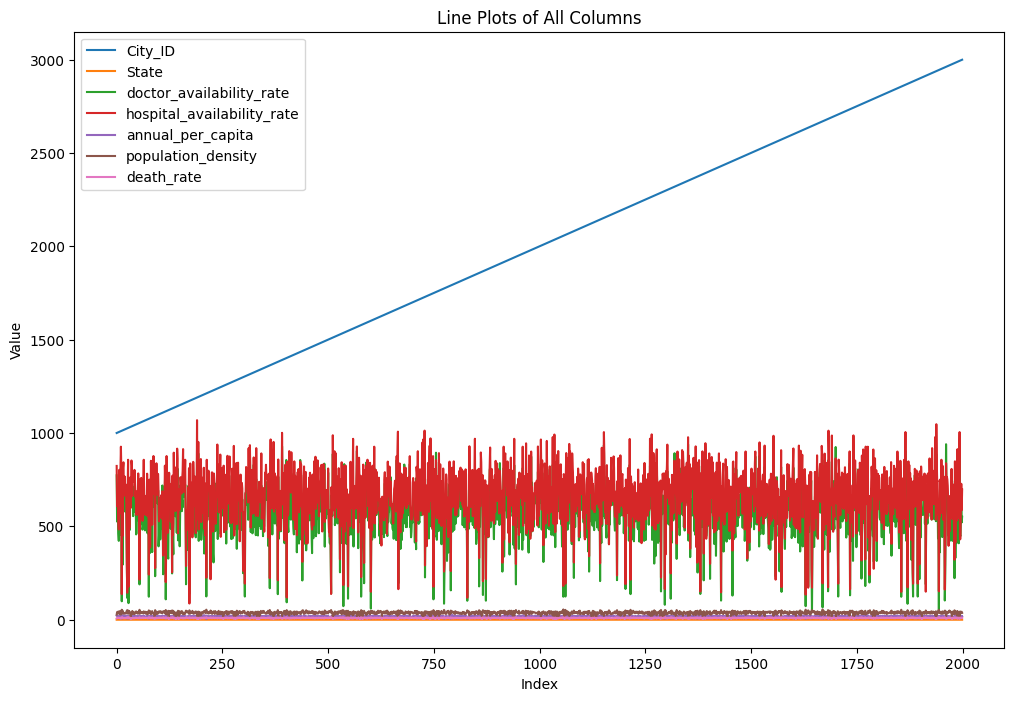

In [21]:
### LINE PLOTS
##It is plotted for data overtime or ordered variables
# Plot line plots for all columns
plt.figure(figsize=(12, 8))

for column in data.columns:
    plt.plot(data[column], label=column)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plots of All Columns')
plt.legend()
plt.show()

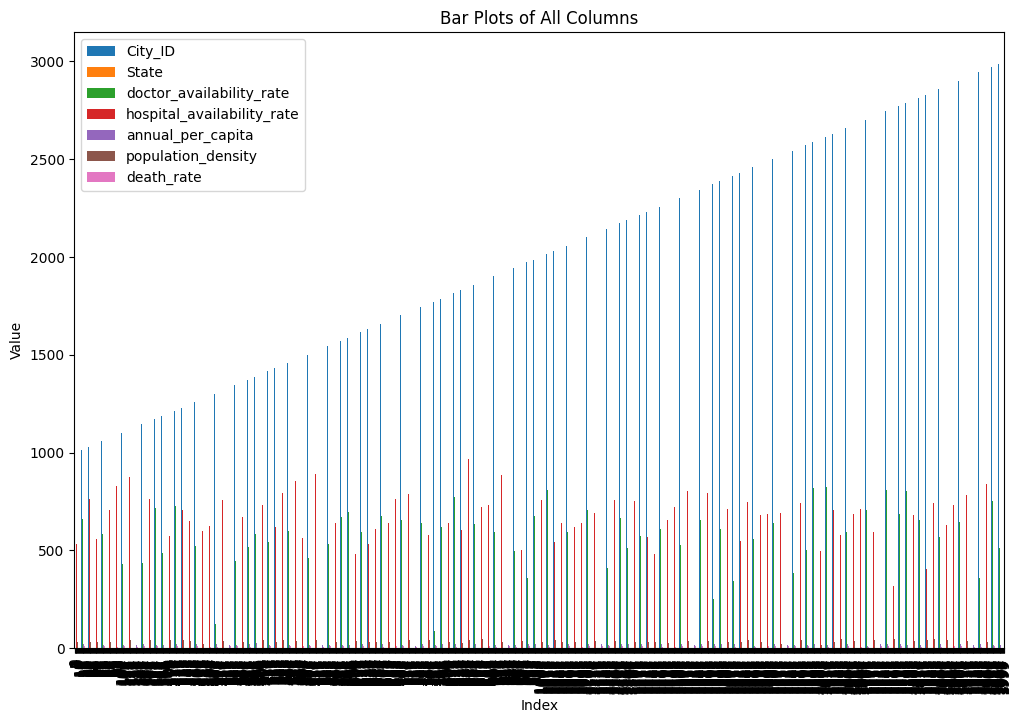

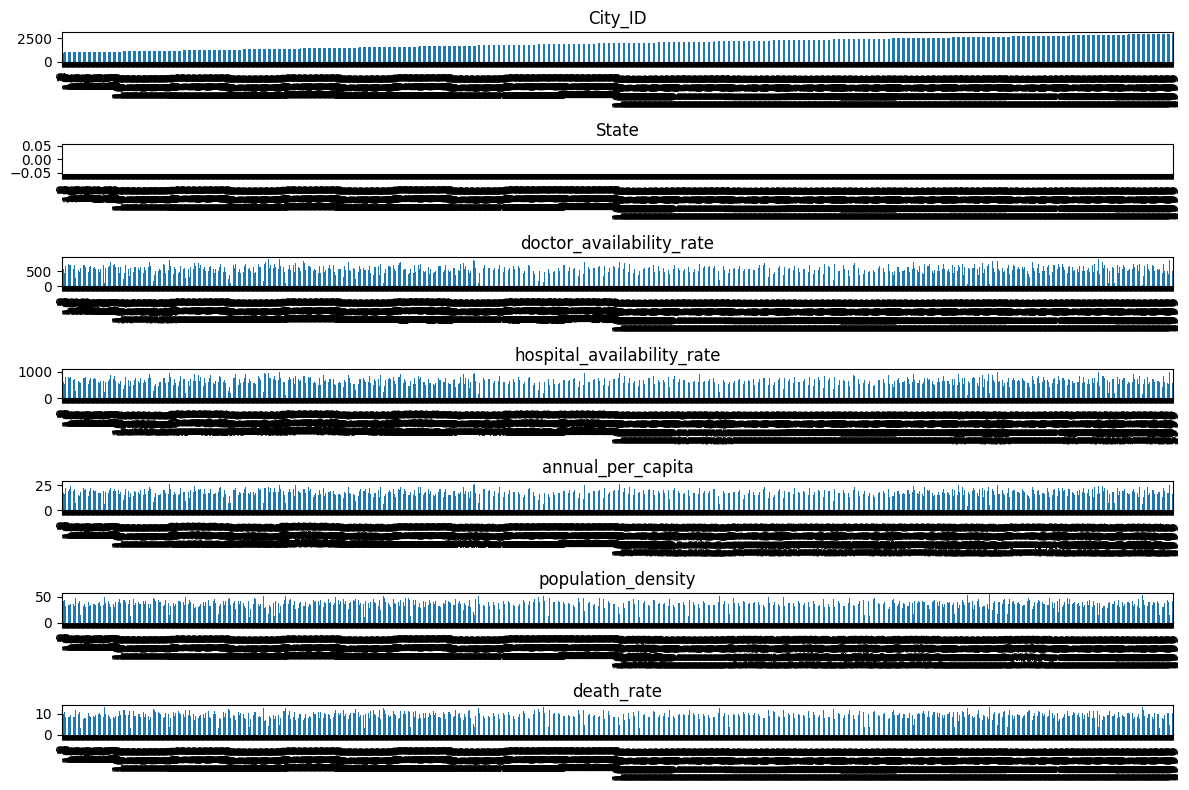

In [22]:
##BAR PLOTS 
##Bar Plots are used to show frequency of categorical variables 
# Plot bar plots for all columns side by side
data.plot(kind='bar', figsize=(12, 8))

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Bar Plots of All Columns')
plt.legend()
plt.show()

# Plot bar plots for each column individually
num_columns = len(data.columns)
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(12, 8))

for i, column in enumerate(data.columns):
    data[column].plot(kind='bar', ax=axes[i], title=column)

plt.tight_layout()
plt.show()

In [23]:
#data = data.drop ('State', axis=1)
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
##ohe = OneHotEncoder ()
ohe = OneHotEncoder(sparse_output=False)
le = LabelEncoder()
State_le = le.fit_transform(data.State)
State_le = State_le.reshape(len(State_le),1)
State_ohe = ohe.fit(State_le)
State_New = State_ohe.transform(State_le)
State_New = pd.DataFrame(State_New)
State_New.columns = ['s1']
data = data.join(State_New[['s1']])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City_ID                     2000 non-null   int64  
 1   State                       2000 non-null   int32  
 2   doctor_availability_rate    2000 non-null   float64
 3   hospital_availability_rate  2000 non-null   float64
 4   annual_per_capita           2000 non-null   float64
 5   population_density          2000 non-null   float64
 6   death_rate                  2000 non-null   float64
 7   s1                          2000 non-null   float64
dtypes: float64(6), int32(1), int64(1)
memory usage: 117.3 KB


In [24]:
columns_to_drop = ['State','s1']
data = data.drop(columns=columns_to_drop) 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City_ID                     2000 non-null   int64  
 1   doctor_availability_rate    2000 non-null   float64
 2   hospital_availability_rate  2000 non-null   float64
 3   annual_per_capita           2000 non-null   float64
 4   population_density          2000 non-null   float64
 5   death_rate                  2000 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 93.9 KB


## Split Train Test
The purpose of this split is to allow you to train your model on one set of data and then evaluate its performance on another set of data that it hasn't seen before.

The most common split is a 70/30 or 80/20 split, where the larger portion is used for training the model and the smaller portion is used for evaluating its performance. The training set is used to fit the model to the data, while the testing set is used to evaluate the model's performance in making predictions on new, unseen data.

So, we decide to split the dataset 70% for training and 30% for testing.

In [25]:
###Splitting the Data into Training and Testing Sets
###The train_test_split function is imported from the scikit-learn library

from sklearn.model_selection import train_test_split 

# Define features and target and selecting the feature and the target variables
##We can tend to have so many features but the target column is very specific
X = data[['doctor_availability_rate']]  # Feature 
y = data['death_rate']                 # Target variable

# Split the data into training and testing sets
###Test Size is a paramt er to change the proportion of the data used for testing as it is declared with a choosen split 
###Random State ensures the spilit is reproducible, this can be any integer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.info())
print(X_test.info())
# Verify the split
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, 836 to 1126
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   doctor_availability_rate  1400 non-null   float64
dtypes: float64(1)
memory usage: 21.9 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 1860 to 942
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   doctor_availability_rate  600 non-null    float64
dtypes: float64(1)
memory usage: 9.4 KB
None
Training set size: (1400, 1)
Testing set size: (600, 1)


## Normalize the Data
Normalization, in the context of data analysis and machine learning, refers to the process of transforming numerical data into a standardized scale. The goal of normalization is to bring different features or variables onto a similar scale to ensure fair comparisons and improve the performance of certain algorithms.

In [26]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [27]:
X_train_std = pd.DataFrame(X_train_std, columns = X_train.columns)
X_test_std = pd.DataFrame(X_test_std, columns = X_train.columns)

## Model Building

In [28]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [29]:
# Import classifiers and Regressors
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import time
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBClassifier

In [30]:
# Initialize and train the regressor
reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 1.9000235582211458
R² Score: 0.2598309151955591


In [31]:
# Initialize and train the regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 1.4835173856555521
R² Score: 0.422084162651028


In [32]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_reg.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = gb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 1.1275217166346123
R² Score: 0.5607650686816179


## REGRESSION MODEL ANALYSIS
In regression tasks, metrics such as accuracy, F1-score, precision, and recall are not applicable because these metrics are designed for classification problems. For regression tasks, we typically use metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), R-squared (R²), and Root Mean Squared Error (RMSE).

However, if you want to evaluate regression models using metrics that somewhat resemble classification metrics, you can discretize the continuous target variable into categories and then evaluate the model as if it were a classification problem. This approach, though, is not standard for regression tasks.

Below is the standard approach for evaluating regression models using appropriate regression metrics:

Regression Metrics
Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values. Lower values are better.
Mean Absolute Error (MAE): Measures the average absolute difference between predicted and actual values. Lower values are better.
R-squared (R²): Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher values are better, with 1 being a perfect score.
Root Mean Squared Error (RMSE): The square root of the MSE, providing an error metric in the same units as the target variable. Lower values are better.

In [33]:
# Initialize the models
dt_regressor = DecisionTreeRegressor(random_state=42)
gb_regressor = GradientBoostingRegressor(random_state=42)
rf_regressor = RandomForestRegressor(random_state=42)

# Train the models
dt_regressor.fit(X_train, y_train)
gb_regressor.fit(X_train, y_train)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_regressor.predict(X_test)
y_pred_gb = gb_regressor.predict(X_test)
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse, mae, r2, rmse

mse_dt, mae_dt, r2_dt, rmse_dt = evaluate_model(y_test, y_pred_dt)
mse_gb, mae_gb, r2_gb, rmse_gb = evaluate_model(y_test, y_pred_gb)
mse_rf, mae_rf, r2_rf, rmse_rf = evaluate_model(y_test, y_pred_rf)

# Print the results
print("Decision Tree Regressor:")
print(f"MSE: {mse_dt}, MAE: {mae_dt}, R²: {r2_dt}, RMSE: {rmse_dt}\n")

print("Gradient Boosting Regressor:")
print(f"MSE: {mse_gb}, MAE: {mae_gb}, R²: {r2_gb}, RMSE: {rmse_gb}\n")

print("Random Forest Regressor:")
print(f"MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}, RMSE: {rmse_rf}\n")

Decision Tree Regressor:
MSE: 1.9000235582211458, MAE: 0.7842815280322692, R²: 0.2598309151955591, RMSE: 1.3784134206475014

Gradient Boosting Regressor:
MSE: 1.1275217166346123, MAE: 0.6062965500264894, R²: 0.5607650686816179, RMSE: 1.061848254994381

Random Forest Regressor:
MSE: 1.4835173856555521, MAE: 0.7163459292051848, R²: 0.422084162651028, RMSE: 1.2179972847488423



## Interpretting Values. 
1. MSE: The Gradient Boosting Regressor has the lowest Mean Sqaured Error
2. MAE: Gradient Boosting Regressor has the lowest Mean Absolute Error
3. R² (R-Squared): Gradient Boosting Regressor has the highest value, the higher the value as it tends to one, the more the perfect the score
4. RMSE: Gradient Boosting Regressor has the lowest value of the Root Mean Squared Error

NB: THE CHOOSEN MODEL IS THE GRADIENT BOOSTING REGRESSOR 

## Analyzing Model Performance using Visualization
Steps to Analyze Patterns in Regression Models
1. Examine Residuals: Look for patterns in the residuals (differences between actual and predicted values). Ideally, residuals should be randomly scattered around zero.
2. Check for Linearity: Ensure that the relationship between features and the target variable is linear if you are using linear regression models.
3. Identify Outliers: Detect outliers that might affect model performance.
4. Multicollinearity: Check for high correlation between independent variables which might affect the model's stability.
5. Model Diagnostics: Use diagnostic plots and statistical tests to assess model assumptions.

RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

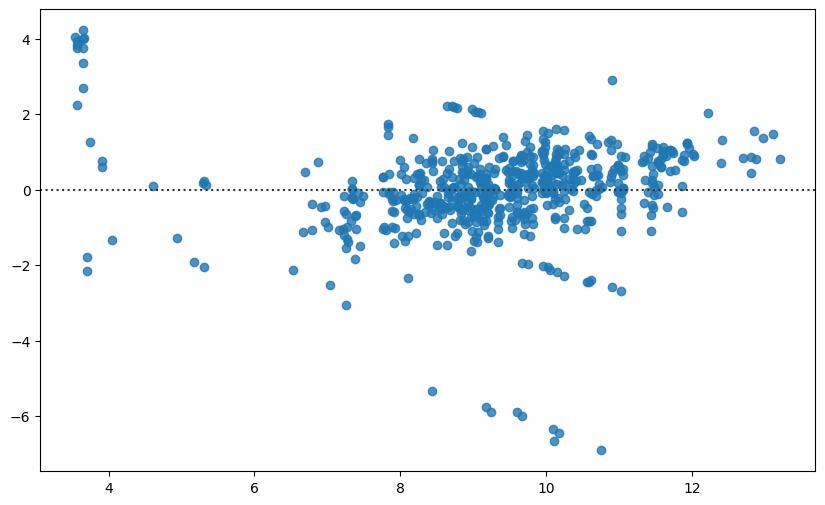

In [34]:
## 1. Residual Plot
## A residual plot helps to visualize the residuals (errors) to check if they are randomly distributed.
    
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot for {model_name}')
    plt.show()

plot_residuals(y_test, y_pred_dt, 'Decision Tree Regressor')
plot_residuals(y_test, y_pred_gb, 'Gradient Boosting Regressor')
plot_residuals(y_test, y_pred_rf, 'Random Forest Regressor')

In [ ]:
## 2. Prediction vs Actual Plot
## This plot helps to visualize how close the predicted values are to the actual values.

def plot_prediction_vs_actual(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Prediction vs Actual for {model_name}')
    plt.show()

plot_prediction_vs_actual(y_test, y_pred_dt, 'Decision Tree Regressor')
plot_prediction_vs_actual(y_test, y_pred_gb, 'Gradient Boosting Regressor')
plot_prediction_vs_actual(y_test, y_pred_rf, 'Random Forest Regressor')

In [ ]:
## 3. Distribution Plot of Residuals
##A distribution plot of residuals can help check if residuals are normally distributed.
def plot_residual_distribution(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, bins=30)
    plt.xlabel('Residuals')
    plt.title(f'Residual Distribution for {model_name}')
    plt.show()

plot_residual_distribution(y_test, y_pred_dt, 'Decision Tree Regressor')
plot_residual_distribution(y_test, y_pred_gb, 'Gradient Boosting Regressor')
plot_residual_distribution(y_test, y_pred_rf, 'Random Forest Regressor')

In [ ]:
def plot_error_histogram(y_test, y_pred, model_name):
    errors = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.hist(errors, bins=30, alpha=0.7)
    plt.xlabel('Prediction Error')
    plt.ylabel('Frequency')
    plt.title(f'Error Histogram for {model_name}')
    plt.show()

plot_error_histogram(y_test, y_pred_dt, 'Decision Tree Regressor')
plot_error_histogram(y_test, y_pred_gb, 'Gradient Boosting Regressor')
plot_error_histogram(y_test, y_pred_rf, 'Random Forest Regressor')

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation error')
    plt.xlabel('Training size')
    plt.ylabel('MSE')
    plt.title(f'Learning Curve for {model_name}')
    plt.legend(loc='best')
    plt.show()

plot_learning_curve(dt_regressor, X, y, 'Decision Tree Regressor')
plot_learning_curve(gb_regressor, X, y, 'Gradient Boosting Regressor')
plot_learning_curve(rf_regressor, X, y, 'Random Forest Regressor')

In [ ]:
##Cook’s Distance for Identifying Influential Points
##Cook’s Distance helps identify influential data points that might unduly influence the regression model.

import statsmodels.api as sm

def plot_cooks_distance(X, y):
    model = sm.OLS(y, sm.add_constant(X)).fit()
    infl = model.get_influence()
    cooks_d = infl.cooks_distance[0]
    
    plt.figure(figsize=(10, 6))
    plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
    plt.title("Cook's Distance")
    plt.xlabel('Observation Index')
    plt.ylabel("Cook's Distance")
    plt.show()

plot_cooks_distance(X, y)

These visualizations will help you analyze and understand the performance of your regression models in detail. You can use these plots to diagnose issues like overfitting, underfitting, and to evaluate the accuracy and error distribution of your models.